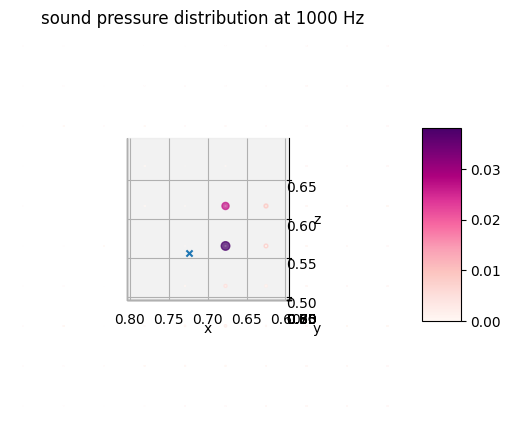

In [ ]:
import numpy as np
import acoular as ac
# import pyfar as pf
import matplotlib.pyplot as plt

resFileName = "out/beamforming_results_25_02_19/2024-08-08_16-59-56_816742/result_2024-08-08_16-59-56_816742"
dotsize = 3
resolution = 0.05

# read Data
result = np.load(resFileName + ".npy")
# start, stop, framerate, frames, frequency_bands, bandwith, resolution, name = pf.io.read(resFileName+".far")
# result_Lp = ac.L_p(result)[4,85]        # convert results in sound pressure Level
# map = result_Lp

# map = result[0,10] # frequenzband 2, frame 41
map = np.sum(result, axis=1)[4]

fig = plt.figure(111, figsize = [7,5])
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=-90, 
             azim=270, 
             roll=0)
# ax.view_init(elev=0, 
#              azim=0, 
#              roll=0)
# ax.view_init(elev=0, 
#              azim=90, 
#              roll=0)
ax.set_proj_type('ortho')#, focal_length=0.547)
x_m, y_m, z_m = np.meshgrid(np.linspace(0,map.shape[0]*resolution,map.shape[0]),
                            np.linspace(0,map.shape[1]*resolution,map.shape[1]), 
                            np.linspace(0,map.shape[2]*resolution,map.shape[2]))
sc = ax.scatter(x_m, y_m, z_m, c = map, s = map*10**dotsize, cmap='RdPu')
sc2 = ax.scatter(0.72439712, 0.62713966, 0.55611907, marker = 'x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(0.6,0.8)
ax.set_ylim(0.55,0.85)
ax.set_zlim(0.5,0.7)
ax.set_xticks(np.arange(0.6,0.8,0.05))
ax.set_yticks(np.arange(0.55,0.85,0.05))
ax.set_zticks(np.arange(0.5,0.7,0.05))
# ax.set_clabel('p in pa')
ax.set_title('sound pressure distribution at '+ str(1000) +' Hz')
ax.set_aspect('equal')
plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
plt.show()